# Project - Concrete Strength Prediction

To predict the concrete strength using the data available in file concrete_data.xls using feature engineering and model tuning to obtain 80% to 95% of R2score.

#### Domain 
Construction and Research

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Submitted by: Deep Singh Chauhan

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Imported basic libraries

In [3]:
# Load dataset into dataframe
df = pd.read_csv('concrete.csv')

In [4]:
# having insight of data by selecting 5 rows
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
# checking size of dataframe
print('\033[1mShape of Dataset: \033[0m', df.shape)

Shape of Dataset:  (1030, 9)


In [6]:
# Identify duplicates records in the data
dupes = df.duplicated()
sum(dupes)

25

there are 25 duplicate records are there in dataset

In [7]:
# checking datatype and not null count. We can see each column has 1030 rows so there is no missing values
print('\033[1mDatatype Info:\033[0m')
print()
df.info()

Datatype Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
# another way of checking missing values. We can confirm ther is no missing value
print('\033[1mNull Value Info:\033[0m')
df.isnull().sum()

Null Value Info:


cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

## Exploratory Data Analysis  

### Univariate analysis

as we know streangh is dependent variable and all others are features. these features can have 0 as valid value. below I am checking for age attribute if that is greater then 365 or less then 1 day 

In [9]:
# checknig if age has more then 365 days
df[df['age'] > 365]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


In [10]:
# checking if age has less then 1 day
df[df['age'] < 1]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


In [11]:
# having look on statistical summary after ignore ID column
# Transposing it for better view
print('\033[1mStatistical Summary:\033[0m')
df.describe().T

Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


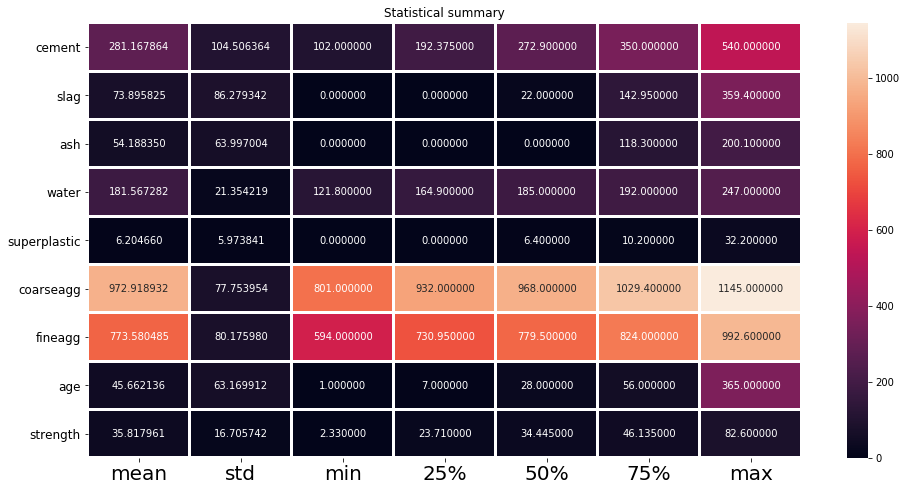

In [12]:
# Ignoring count column and displaying same summary in headmap
plt.figure(figsize=(16,8))
sns.heatmap(df.describe()[1:].transpose(),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Statistical summary")
plt.show()

In [13]:
# Slag, ash, age has wide difference in mean and 50% values. mean > median, so being a right tailed skewness in data.
# slag, ash, and superplastic has min value as 0.
# as mentioned in discussion forum slag, ash, and superplastic can have 0 as valid values
# cement has min = 102, std = 104, range is 102 - 540, value of std and min are very near
# Water std is < min value,

# looking at differences b/w ( Q1,median ) and (Q3 and median) in columns slag, ash there are huge number of outliers.
# Other columns has very little diff b/w ( Q1,median ) and (Q3 and median), so there might be very few outliers

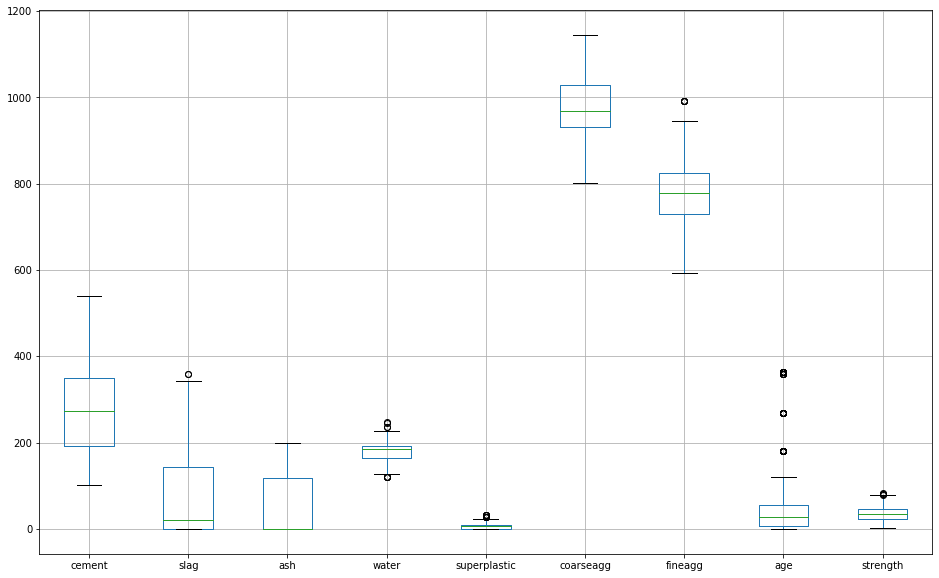

In [14]:
plt.figure(figsize=(16,10))
df.boxplot()
plt.show()

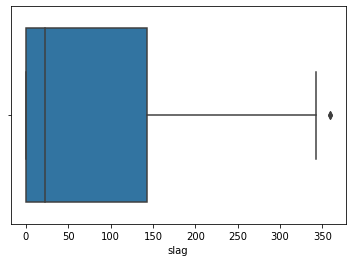

In [15]:
sns.boxplot(data=df, x='slag') 

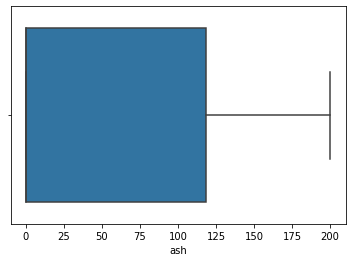

In [16]:
sns.boxplot(data=df, x='ash') 

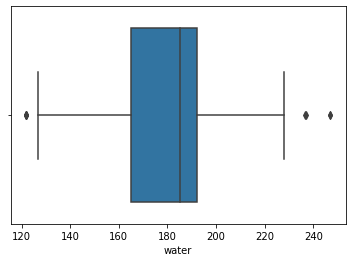

In [17]:
sns.boxplot(data=df, x='water') 

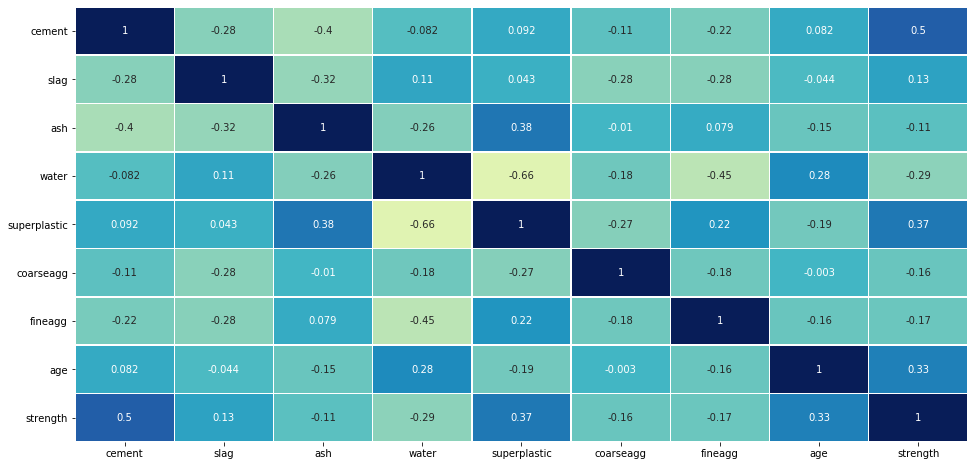

In [18]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

In [19]:
# high positive correlation between cement and strength
# positive correlation between age and strength
# positive correlation between supterplastic and strength
# positive correlations between supterplastic and ash, fineagg
# negative correlation between supterplastic and water
# negative correlation between water and fineagg

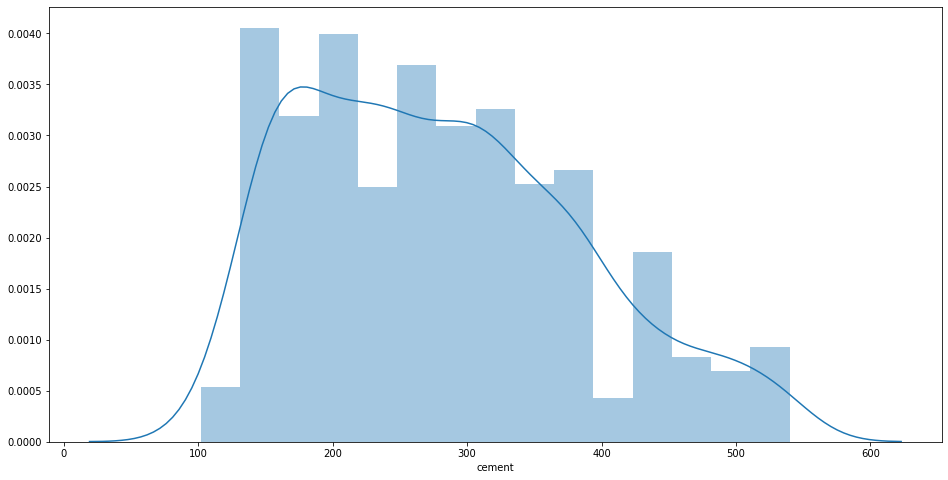

In [20]:
# cement distribution
plt.figure(figsize=(16,8))
sns.distplot(df['cement'])

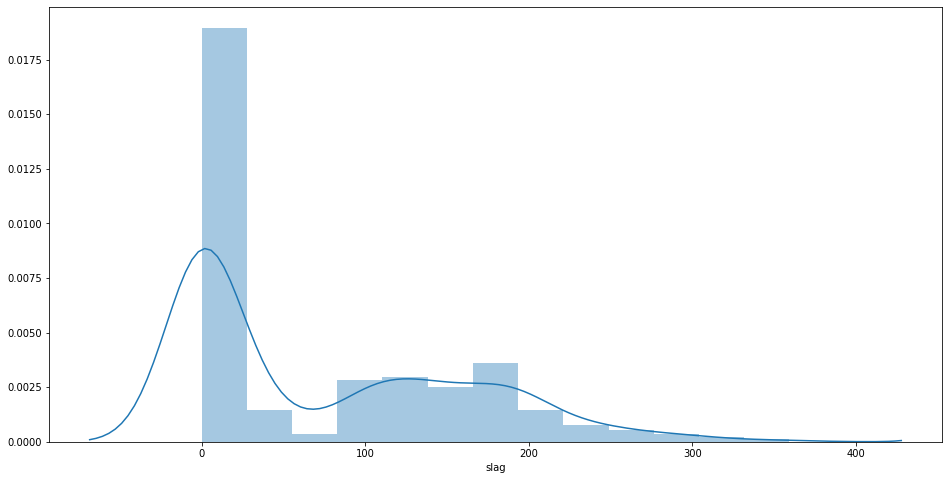

In [21]:
# slag distribution
plt.figure(figsize=(16,8))
sns.distplot(df['slag'])

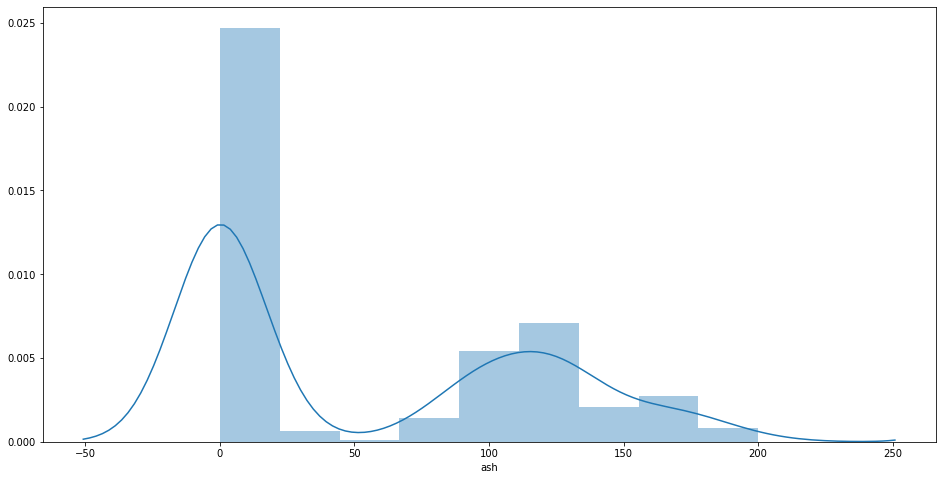

In [22]:
# ash distribution
plt.figure(figsize=(16,8))
sns.distplot(df['ash'])

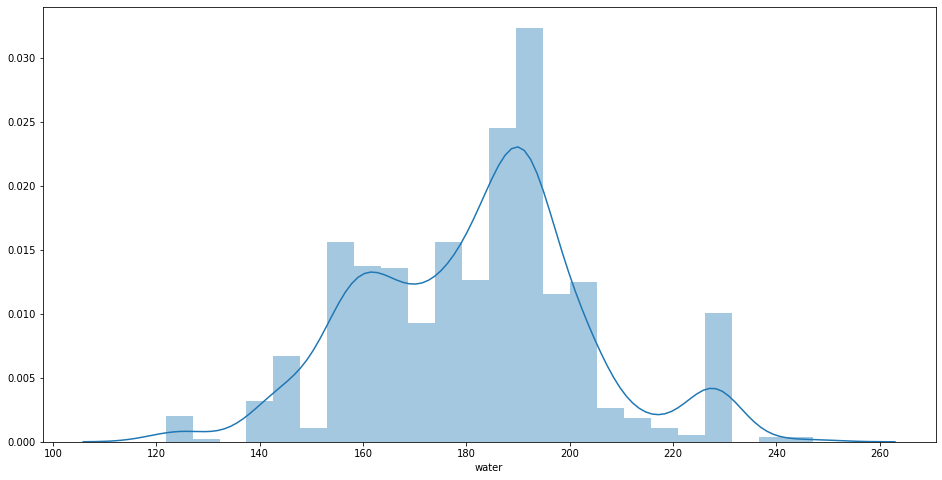

In [23]:
# water distribution
plt.figure(figsize=(16,8))
sns.distplot(df['water'])

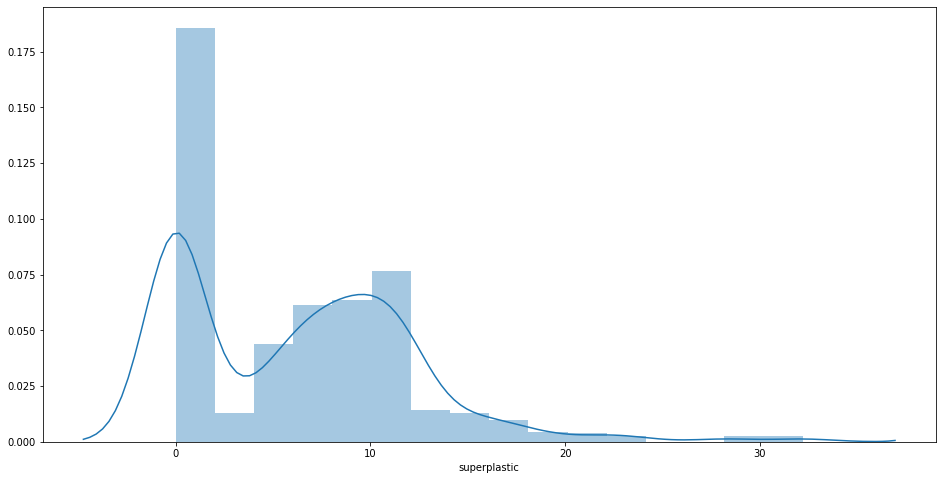

In [24]:
# superplastic distribution
plt.figure(figsize=(16,8))
sns.distplot(df['superplastic'])

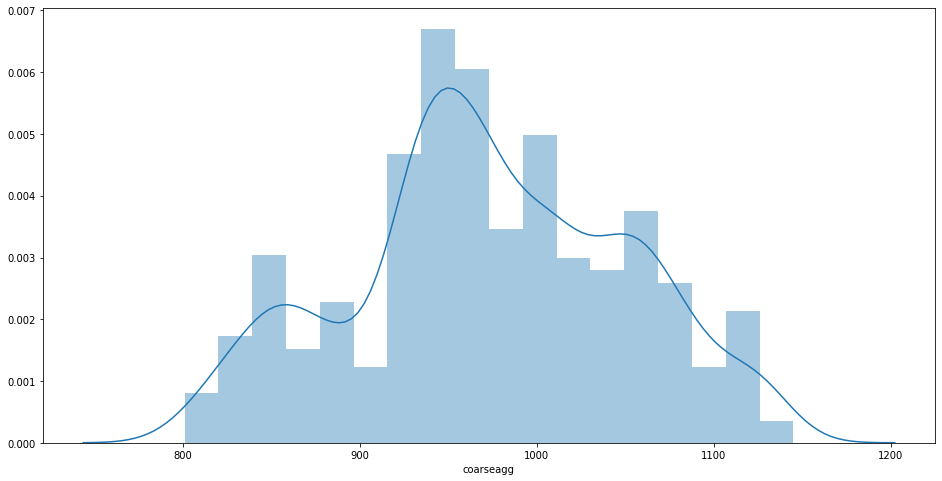

In [25]:
# coarseagg distribution
plt.figure(figsize=(16,8))
sns.distplot(df['coarseagg'])

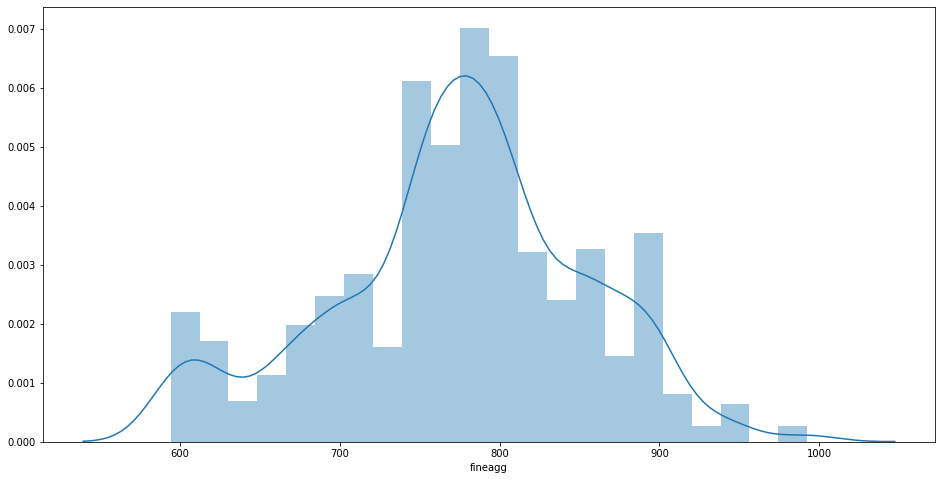

In [26]:
# fineagg distribution
plt.figure(figsize=(16,8))
sns.distplot(df['fineagg'])

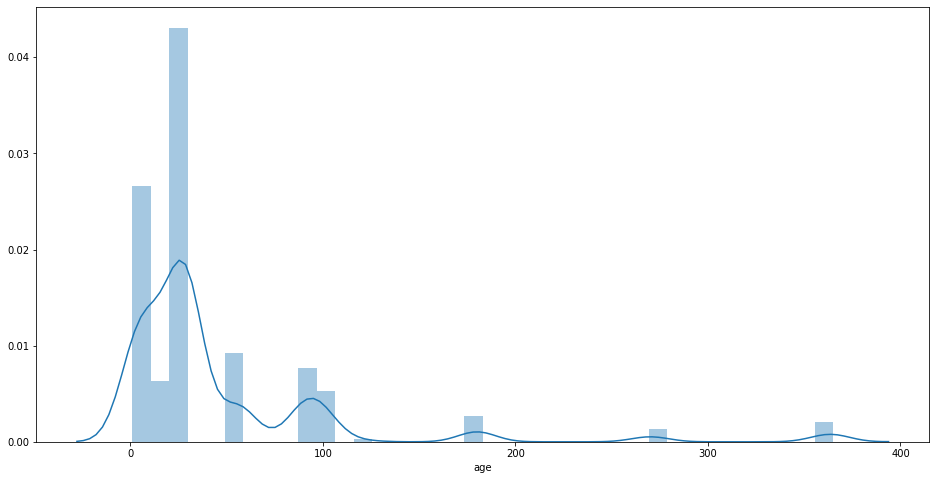

In [27]:
# age distribution
plt.figure(figsize=(16,8))
sns.distplot(df['age'])

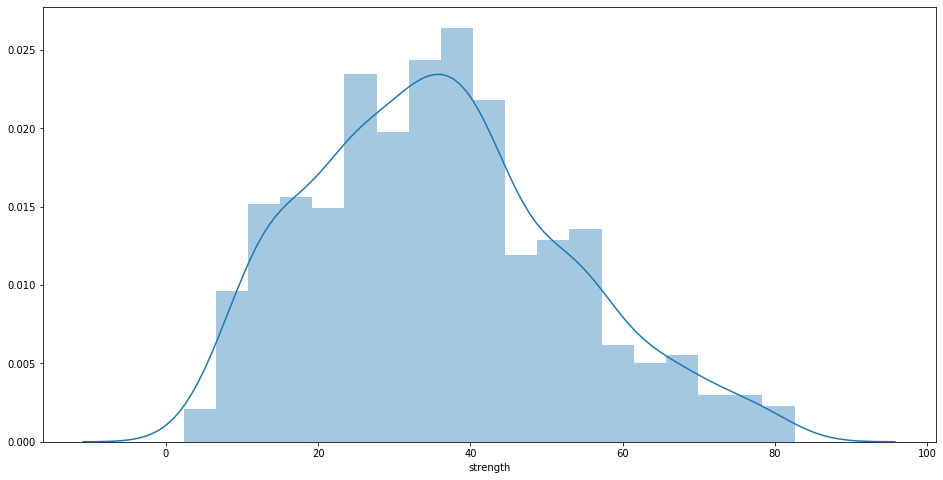

In [28]:
# strength distribution
plt.figure(figsize=(16,8))
sns.distplot(df['strength'])

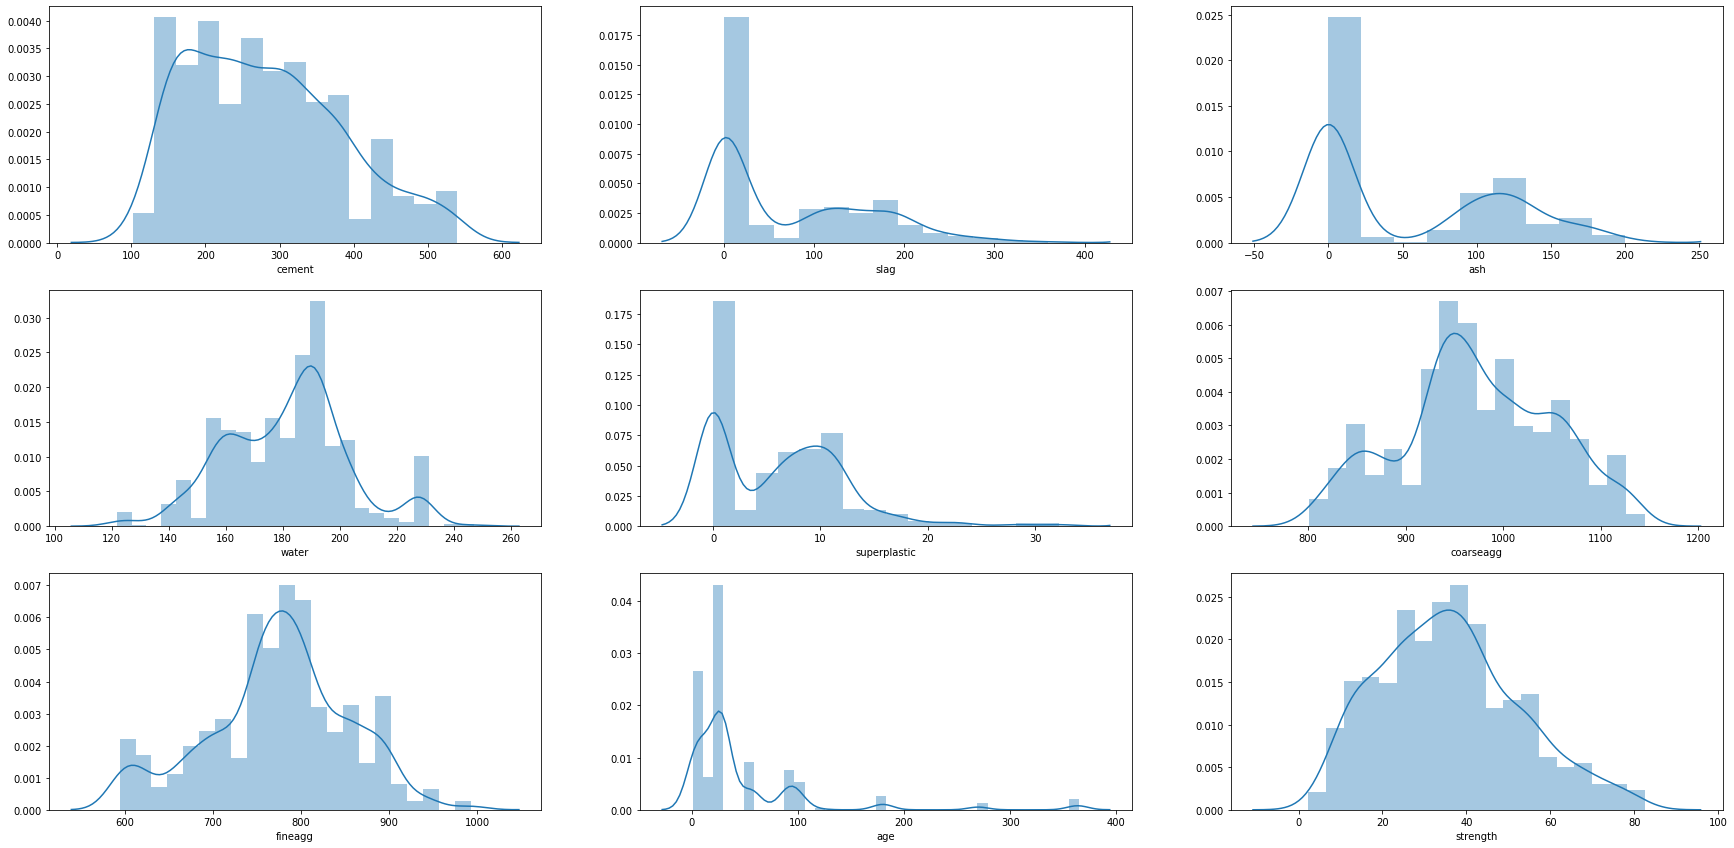

In [29]:
# looking everything together

plt.figure(figsize= (30,20))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
feedback = df.columns

for i in feedback:
    plt.subplot(4, 3, pos)
    sns.distplot(df[i])  
    pos += 1  # to plot over the grid one by one  

### Bi-Variate analysis

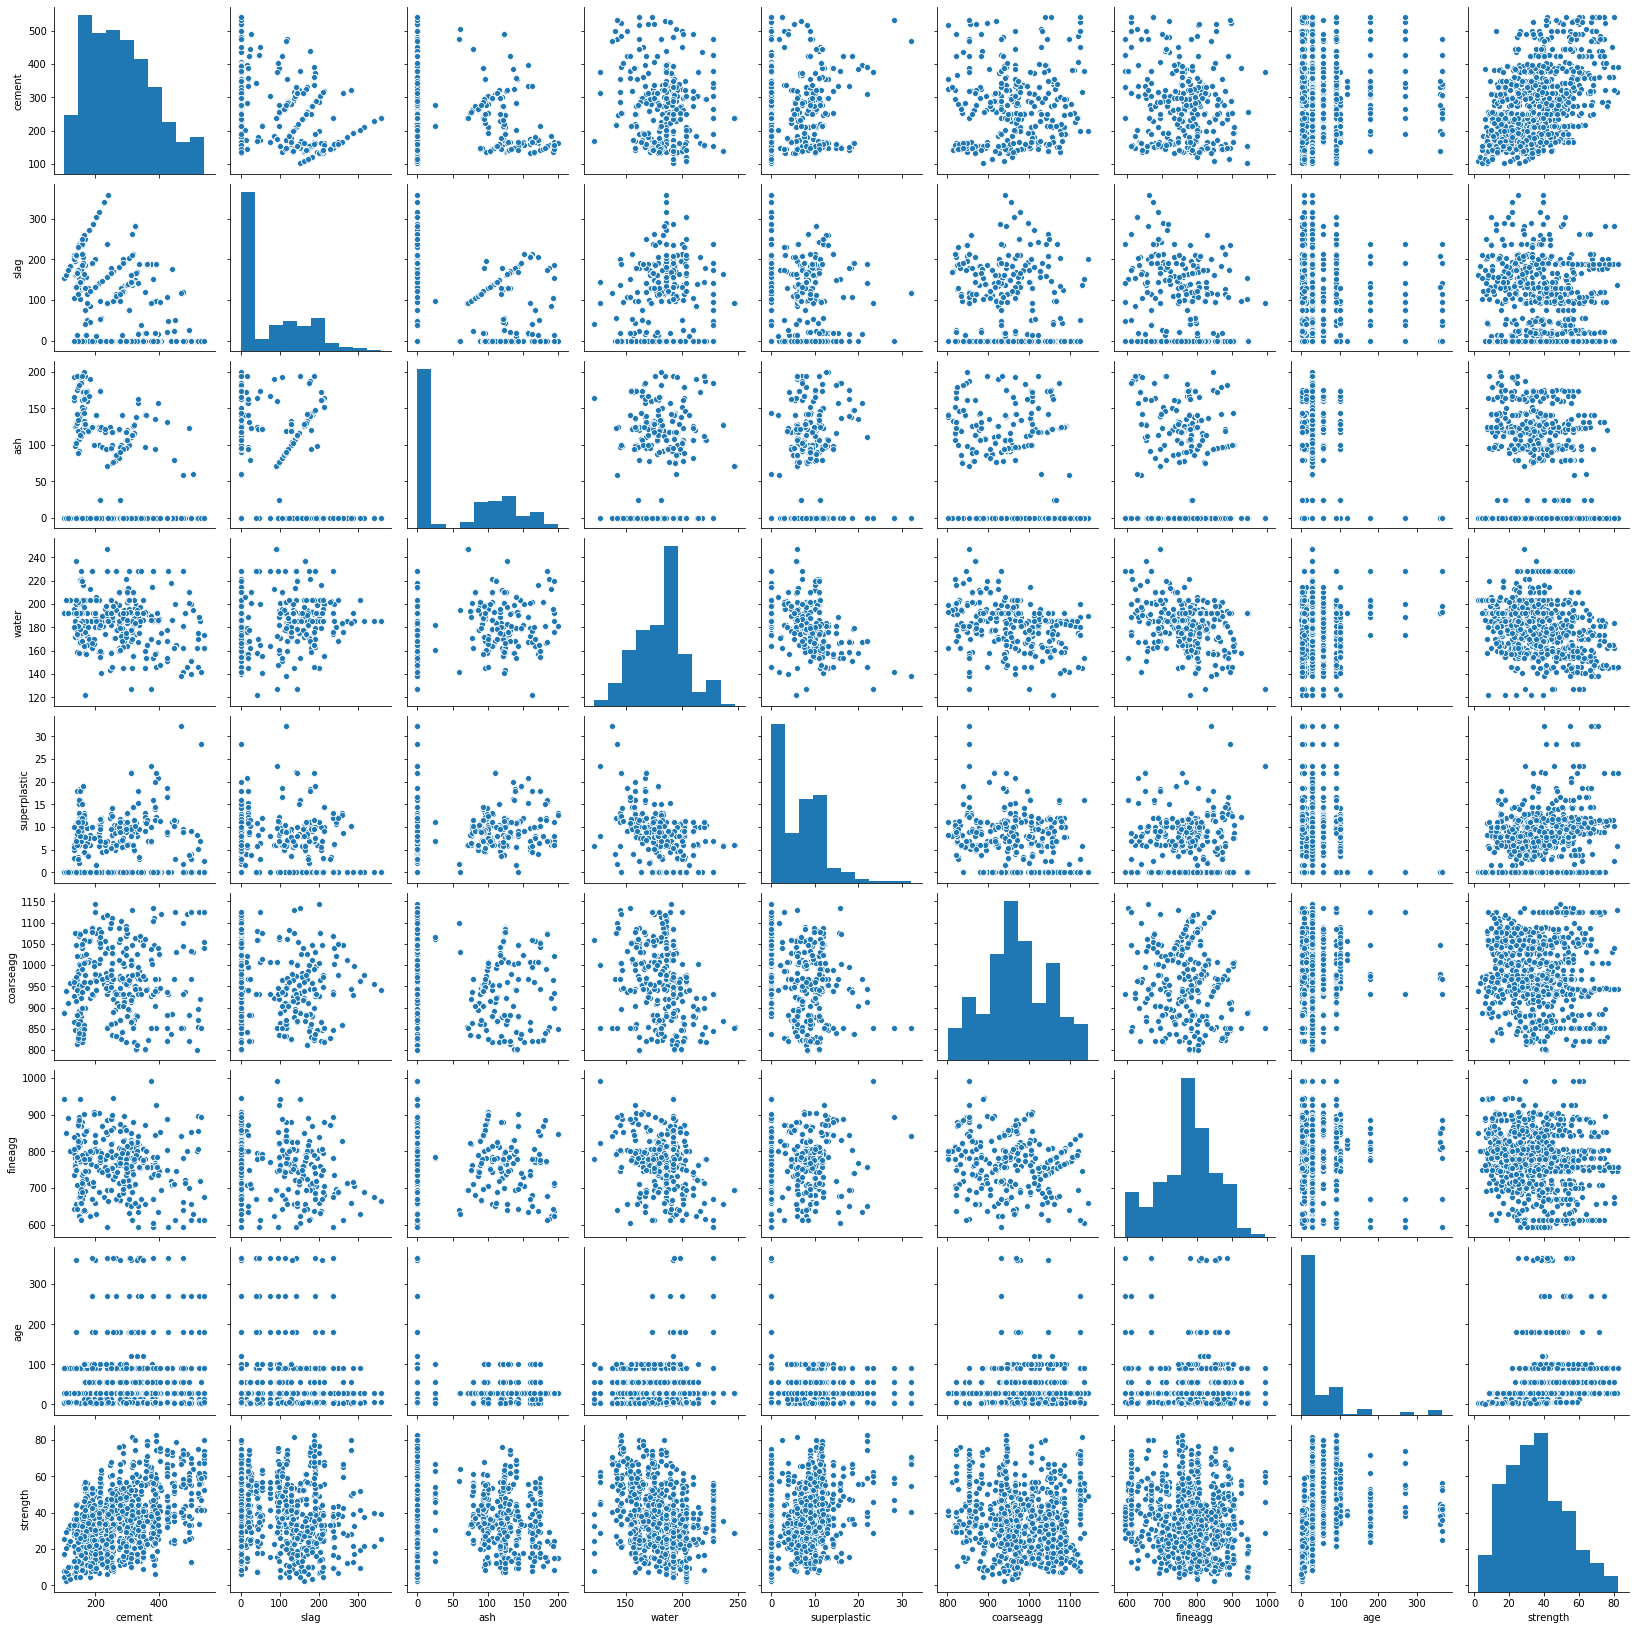

In [30]:
sns.pairplot(df)

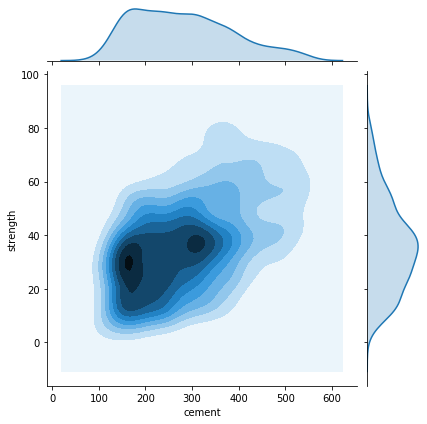

In [31]:
sns.jointplot(data=df, x='cement', y='strength', kind="kde")

In [32]:
# # high positive correlation between cement and strength

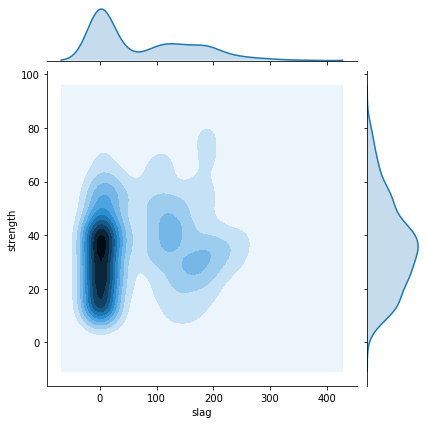

In [33]:
sns.jointplot(data=df, x='slag', y='strength', kind="kde")

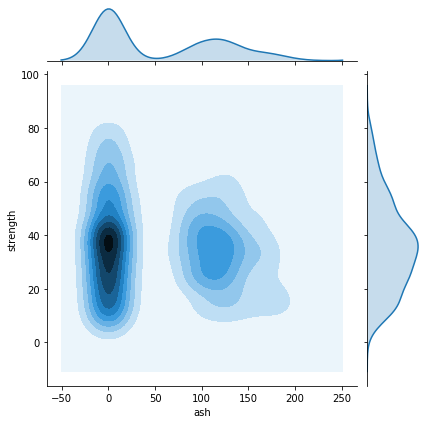

In [34]:
sns.jointplot(data=df, x='ash', y='strength', kind="kde")

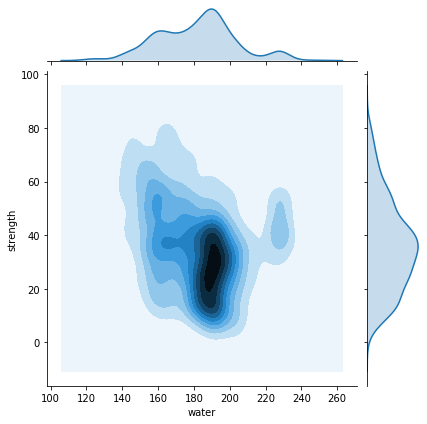

In [35]:
sns.jointplot(data=df, x='water', y='strength', kind="kde")

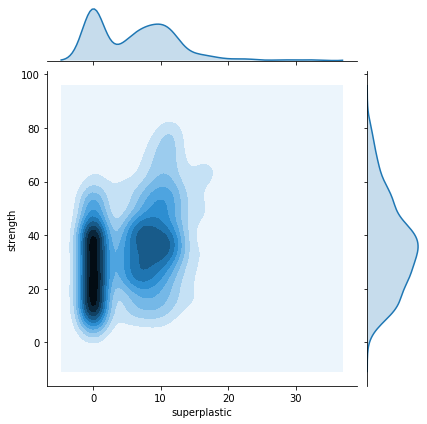

In [36]:
sns.jointplot(data=df, x='superplastic', y='strength', kind="kde")

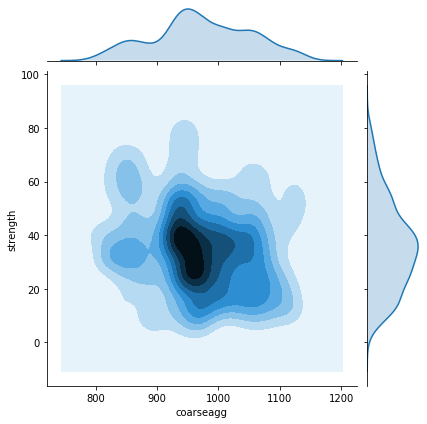

In [37]:
sns.jointplot(data=df, x='coarseagg', y='strength', kind="kde")

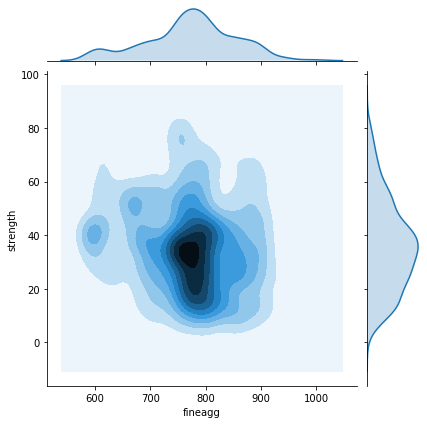

In [38]:
sns.jointplot(data=df, x='fineagg', y='strength', kind="kde")

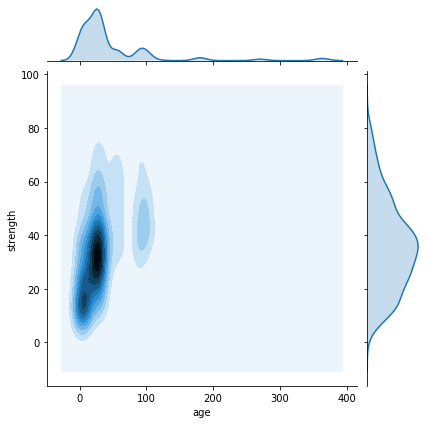

In [39]:
sns.jointplot(data=df, x='age', y='strength', kind="kde")

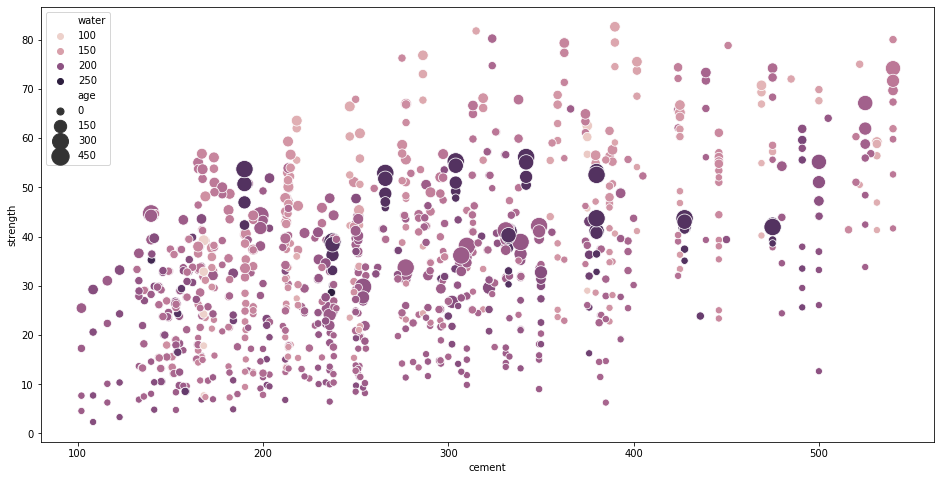

In [40]:
# strength vs cement, age and water
plt.figure(figsize=(16,8))
sns.scatterplot(data=df, y="strength", x="cement", hue="water",size="age", sizes=(50, 300))

In [41]:
# strength increases with age
# strength increases with cement
# as cement get older it needs more water to better strength

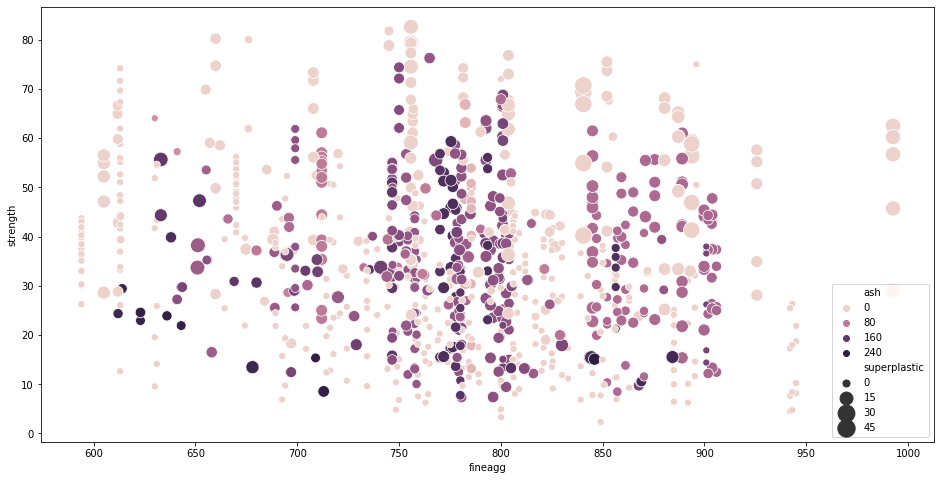

In [42]:
# strength vs fineagg, ash and superplastic
plt.figure(figsize=(16,8))
sns.scatterplot(data=df, y="strength", x="fineagg", hue="ash",size="superplastic", sizes=(50, 300))

In [43]:
# strength increases with superplastic
# strength decreses with ash

### Feature Engineering techniques

In [44]:
# age has range from 1 to 365, its better to change the number of days to months data. 

In [45]:
def label(data):
    if data["age"] <= 30:
        return "1"
    if data["age"] > 30 and data["age"] <= 60 :
        return "2"
    if data["age"] > 60 and data["age"] <= 90 :
        return "3"
    if data["age"] > 90 and data["age"] <= 120 :
        return "4"
    if data["age"] > 120 and data["age"] <= 150 :
        return "5"
    if data["age"] > 150 and data["age"] <= 180 :
        return "6"
    if data["age"] > 180 and data["age"] <= 210 :
        return "7"
    if data["age"] > 210 and data["age"] <= 240 :
        return "8"
    if data["age"] > 240 and data["age"] <= 270 :
        return "9"
    if data["age"] > 270 and data["age"] <= 300 :
        return "10"
    if data["age"] > 300 and data["age"] <= 330 :
        return "11"
    if data["age"] > 330 :
        return "12"

In [46]:
df["monthlyage"] = df.apply(lambda df:label(df) , axis=1)

In [47]:
df["monthlyage"] = df["monthlyage"].astype(int)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
 9   monthlyage    1030 non-null   int32  
dtypes: float64(8), int32(1), int64(1)
memory usage: 76.6 KB


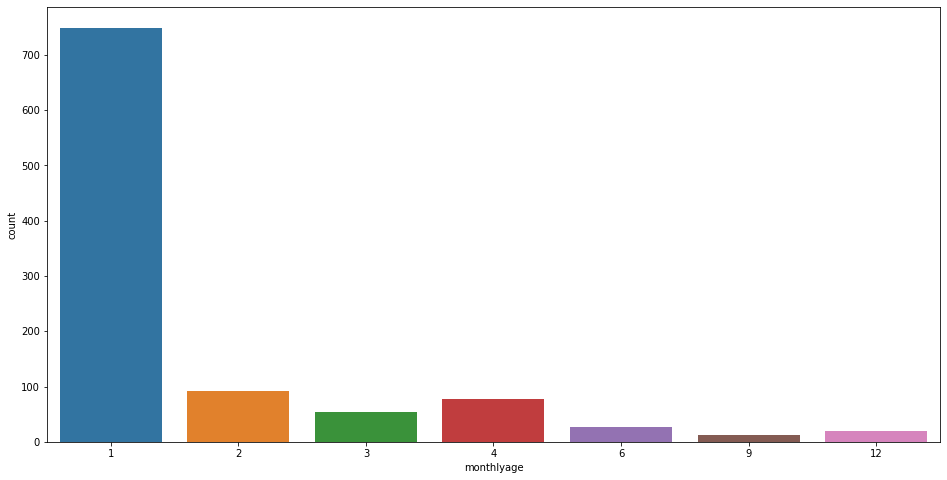

In [49]:
# age in months
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='monthlyage')

In [50]:
# we can see here most data falls within 30 days i.e. 1 month

In [51]:
# after reading about Concrete's compressive strength
# its range can vary from 2500 psi (17 MPa) for residential concrete to 4000psi (28 MPa) 
# and higher in commercial structures.
# Higher strengths upto and exceeding 10,000 psi (70 MPa) are specified for certain applications.

In [52]:
def lab(data):
    if data["strength"] <= 17:
        return "1"
    if data["strength"] >17 and data["strength"] <= 28 :
        return "2"
    if data["strength"] >28 :
        return "3 "

In [53]:
df["strength_category"] =df.apply(lambda df:lab(df) ,axis =1)

In [54]:
df["strength_category"] = df["strength_category"].astype(int)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cement             1030 non-null   float64
 1   slag               1030 non-null   float64
 2   ash                1030 non-null   float64
 3   water              1030 non-null   float64
 4   superplastic       1030 non-null   float64
 5   coarseagg          1030 non-null   float64
 6   fineagg            1030 non-null   float64
 7   age                1030 non-null   int64  
 8   strength           1030 non-null   float64
 9   monthlyage         1030 non-null   int32  
 10  strength_category  1030 non-null   int32  
dtypes: float64(8), int32(2), int64(1)
memory usage: 80.6 KB


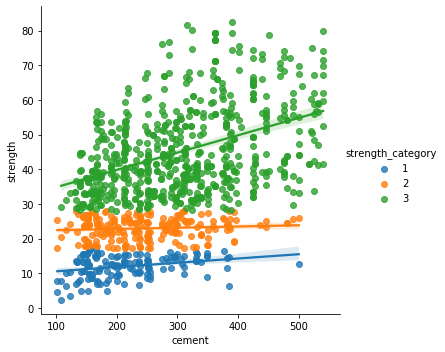

In [56]:
sns.lmplot(x='cement',y='strength',data= df,hue= 'strength_category')

### Creating train and test datasets

In [57]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,monthlyage,strength_category
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1,3
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,1,2
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,1,3
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,1,3
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1,2


In [58]:
# tried algorihtms with new columns montly age and strength category but results were better with old columns 
# so deleting these columns

In [59]:
# dropping column age and strength, i will use monthly age and strength category
# df.drop(['age','strength'], axis=1, inplace=True)
# df.drop(['age'], axis=1, inplace=True)

df.drop(['monthlyage','strength_category'], axis=1, inplace=True)

In [60]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [61]:
# features and target variables setup

# X = df.drop('strength_category', axis=1)
# y = df['strength_category']

X = df.drop('strength', axis=1)
y = df['strength']

In [62]:
print(X.shape)
print(y.shape)

(1030, 8)
(1030,)


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

### Scaling

In [65]:
sc = StandardScaler() 

In [66]:
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

## Model Building

### Liner Regression

In [67]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

In [68]:
# Linear Regression 
lr = LinearRegression() 

# Lasso Regression 
lasso = Lasso() 

# Ridge Regression 
ridge = Ridge() 

# Fitting models on Training data 
lr.fit(X_train, y_train) 
lasso.fit(X_train, y_train) 
ridge.fit(X_train, y_train) 

# Making predictions on Test data 
y_pred_lr = lr.predict(X_test) 
y_pred_lasso = lasso.predict(X_test) 
y_pred_ridge = ridge.predict(X_test) 

In [69]:
# Kfold Cross Validation
cvscore_lr = cross_val_score(lr, X, y, cv = 10).mean()
cvscore_lasso = cross_val_score(lasso, X, y, cv = 10).mean()
cvscore_ridge = cross_val_score(ridge, X, y, cv = 10).mean()

In [70]:
# creating accuracy dataframe to store different model performance for later comparision
accuracyDf = pd.DataFrame({'Method':['Linear Regression'], 'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr)), 'R2': r2_score(y_test, y_pred_lr), 'Kfold 10': cvscore_lr})

tempaccr = pd.DataFrame({'Method':['Lasso Regression'], 'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lasso)), 'R2': r2_score(y_test, y_pred_lasso), 'Kfold 10': cvscore_lasso})
accuracyDf = pd.concat([accuracyDf, tempaccr])

tempaccr = pd.DataFrame({'Method':['Ridge Regression'], 'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_ridge)), 'R2': r2_score(y_test, y_pred_ridge), 'Kfold 10': cvscore_ridge})
accuracyDf = pd.concat([accuracyDf, tempaccr])

accuracyDf

,Method,RMSE,R2,Kfold 10
0,Linear Regression,10.076742,0.638960,0.591910
0,Lasso Regression,11.023554,0.567926,0.591623
0,Ridge Regression,10.091033,0.637936,0.591911


In [71]:
def autolabel(rects): 
   """Attach a text label above each bar in *rects*, displaying its height.""" 
   for rect in rects: 
      height = rect.get_height() 
      ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() +
        rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom') 

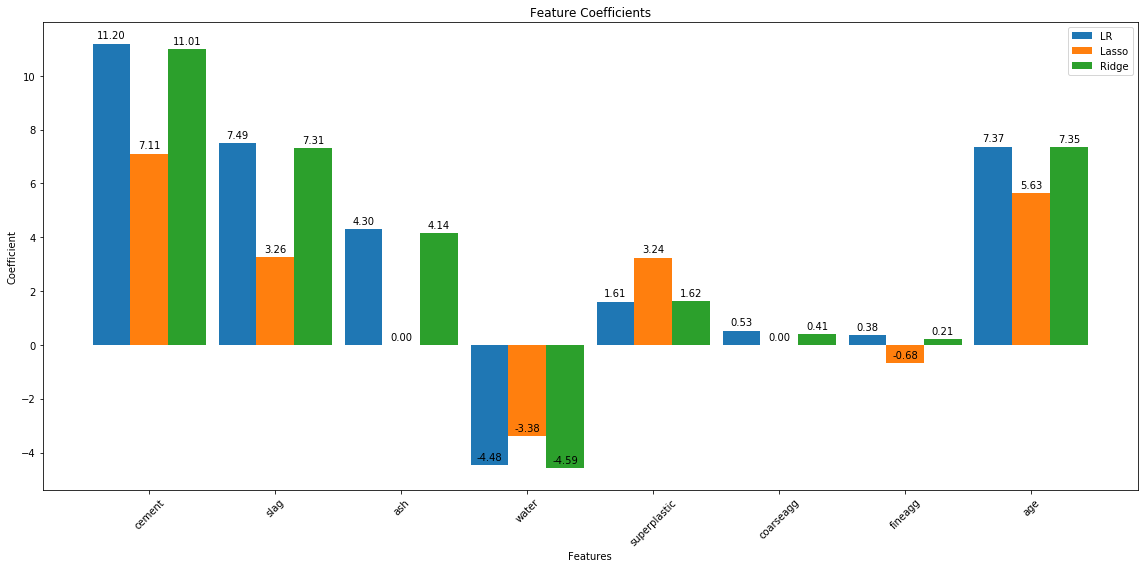

In [72]:
coeff_lr = lr.coef_ 
coeff_lasso = lasso.coef_ 
coeff_ridge = ridge.coef_ 

labels = X.columns 
x = np.arange(len(labels)) 
width = 0.3 

fig, ax = plt.subplots(figsize=(16,8)) 
rects1 = ax.bar(x - 2*(width/2), coeff_lr, width, label='LR') 
rects2 = ax.bar(x, coeff_lasso, width, label='Lasso') 
rects3 = ax.bar(x + 2*(width/2), coeff_ridge, width, label='Ridge') 

ax.set_ylabel('Coefficient') 
ax.set_xlabel('Features') 
ax.set_title('Feature Coefficients') 
ax.set_xticks(x) 
ax.set_xticklabels(labels, rotation=45) 
ax.legend() 

autolabel(rects1) 
autolabel(rects2) 
autolabel(rects3) 
fig.tight_layout() 
plt.show()

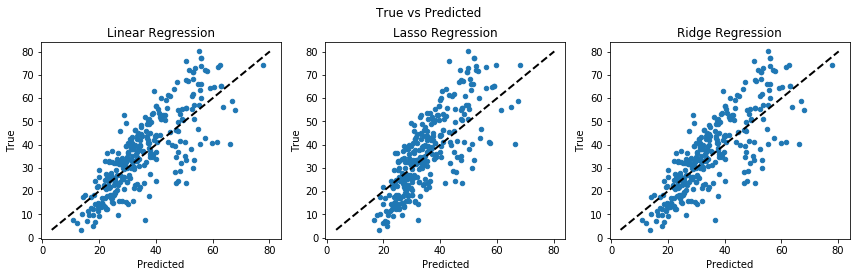

In [73]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4)) 

ax1.scatter(y_pred_lr, y_test, s=20) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax1.set_ylabel("True") 
ax1.set_xlabel("Predicted") 
ax1.set_title("Linear Regression") 

ax2.scatter(y_pred_lasso, y_test, s=20) 
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax2.set_ylabel("True") 
ax2.set_xlabel("Predicted") 
ax2.set_title("Lasso Regression") 

ax3.scatter(y_pred_ridge, y_test, s=20) 
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax3.set_ylabel("True") 
ax3.set_xlabel("Predicted") 
ax3.set_title("Ridge Regression") 

fig.suptitle("True vs Predicted") 
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

### Decision Trees

In [74]:
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor() 
dtr.fit(X_train, y_train) 
y_pred_dtr = dtr.predict(X_test) 

In [75]:
cvscore_dtr = cross_val_score(dtr, X, y, cv = 10).mean()

In [76]:
tempaccr = pd.DataFrame({'Method':['Decision Tree Regressor'], 'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_dtr)), 'R2': r2_score(y_test, y_pred_dtr), 'Kfold 10': cvscore_dtr})
accuracyDf = pd.concat([accuracyDf, tempaccr])

accuracyDf

,Method,RMSE,R2,Kfold 10
0,Linear Regression,10.076742,0.638960,0.591910
0,Lasso Regression,11.023554,0.567926,0.591623
0,Ridge Regression,10.091033,0.637936,0.591911
0,Decision Tree Regressor,6.626463,0.843873,0.868990


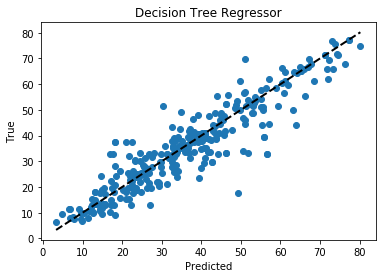

In [77]:
plt.scatter(y_test, y_pred_dtr) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Decision Tree Regressor") 
plt.show()

In [78]:
# The Root Mean Squared Error (RMSE) has come down. so performance has increased by Decision Tree regressor.

### Random Forest

In [79]:
from sklearn.ensemble import RandomForestRegressor 

rfr = RandomForestRegressor(n_estimators=100) 
rfr.fit(X_train, y_train) 

y_pred_rfr = rfr.predict(X_test) 

In [80]:
cvscore_rfr = cross_val_score(rfr, X, y, cv = 10).mean()

In [81]:
tempaccr = pd.DataFrame({'Method':['Random Forest Regressor'], 'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rfr)), 'R2': r2_score(y_test, y_pred_rfr), 'Kfold 10': cvscore_rfr})
accuracyDf = pd.concat([accuracyDf, tempaccr])
accuracyDf

,Method,RMSE,R2,Kfold 10
0,Linear Regression,10.076742,0.638960,0.591910
0,Lasso Regression,11.023554,0.567926,0.591623
0,Ridge Regression,10.091033,0.637936,0.591911
0,Decision Tree Regressor,6.626463,0.843873,0.868990
0,Random Forest Regressor,5.149977,0.905697,0.918364


In [82]:
# RMSE has further reduced by ensembling multiple trees
# R2 increased to 91% 
# cross validation score with 10 fold increased to 92%

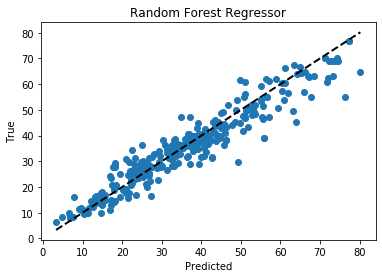

In [83]:
plt.scatter(y_test, y_pred_rfr) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Random Forest Regressor") 
plt.show()

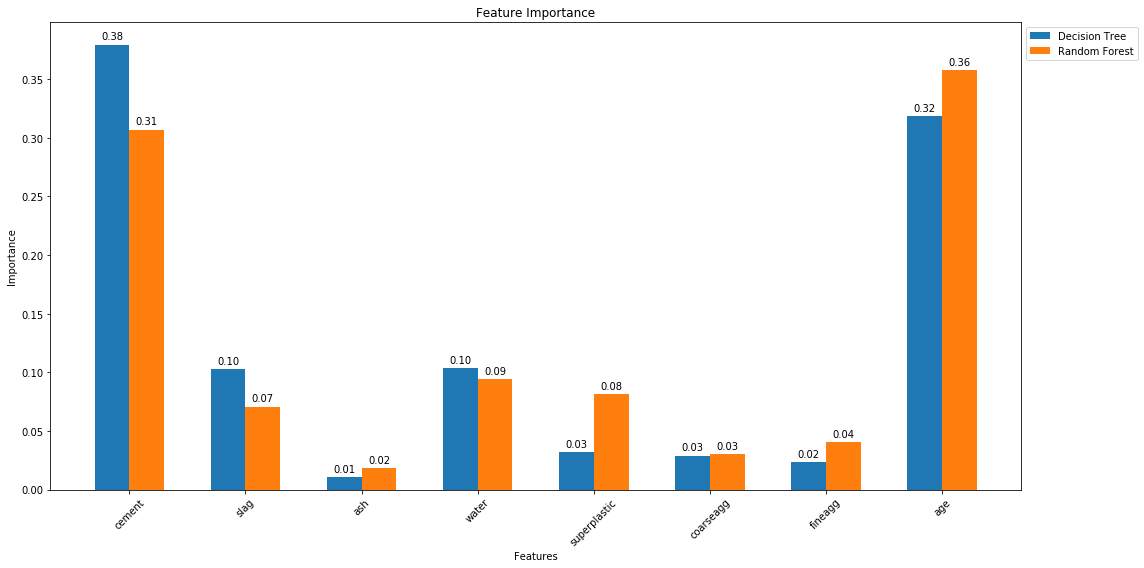

In [84]:
feature_dtr = dtr.feature_importances_ 
feature_rfr = rfr.feature_importances_ 

labels = X.columns 
x = np.arange(len(labels)) 
width = 0.3 

fig, ax = plt.subplots(figsize=(16,8)) 
rects1 = ax.bar(x-(width/2), feature_dtr, width, label='Decision Tree') 
rects2 = ax.bar(x+(width/2), feature_rfr, width, label='Random Forest') 

ax.set_ylabel('Importance') 
ax.set_xlabel('Features') 
ax.set_title('Feature Importance') 
ax.set_xticks(x) 
ax.set_xticklabels(labels, rotation=45) 
ax.legend(loc="upper left", bbox_to_anchor=(1,1)) 

autolabel(rects1) 
autolabel(rects2) 

fig.tight_layout() 
plt.show()

### AdaBoost Classifier

In [85]:
from sklearn.ensemble import AdaBoostRegressor

In [86]:
#abr = AdaBoostRegressor(n_estimators=10, random_state=1)
abr = AdaBoostRegressor( n_estimators=50,random_state=1)
abr.fit(X_train, y_train)

y_pred_abr = abr.predict(X_test) 

In [87]:
cvscore_abr = cross_val_score(abr, X, y, cv = 10).mean()

### Multiple scores matrix

In [88]:
tempaccr = pd.DataFrame({'Method':['AdaBoost Regressor'], 'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_abr)), 'R2': r2_score(y_test, y_pred_abr), 'Kfold 10': cvscore_abr})
accuracyDf = pd.concat([accuracyDf, tempaccr])

accuracyDf

,Method,RMSE,R2,Kfold 10
0,Linear Regression,10.076742,0.638960,0.591910
0,Lasso Regression,11.023554,0.567926,0.591623
0,Ridge Regression,10.091033,0.637936,0.591911
0,Decision Tree Regressor,6.626463,0.843873,0.868990
0,Random Forest Regressor,5.149977,0.905697,0.918364
0,AdaBoost Regressor,7.470447,0.801570,0.787076


In [89]:
models = [lr, lasso, ridge, dtr, rfr, abr] 
names = ["Linear Regression", "Lasso Regression", "Ridge Regression", "Decision Tree Regressor", "Random Forest Regressor", "AdaBoost Regressor"] 

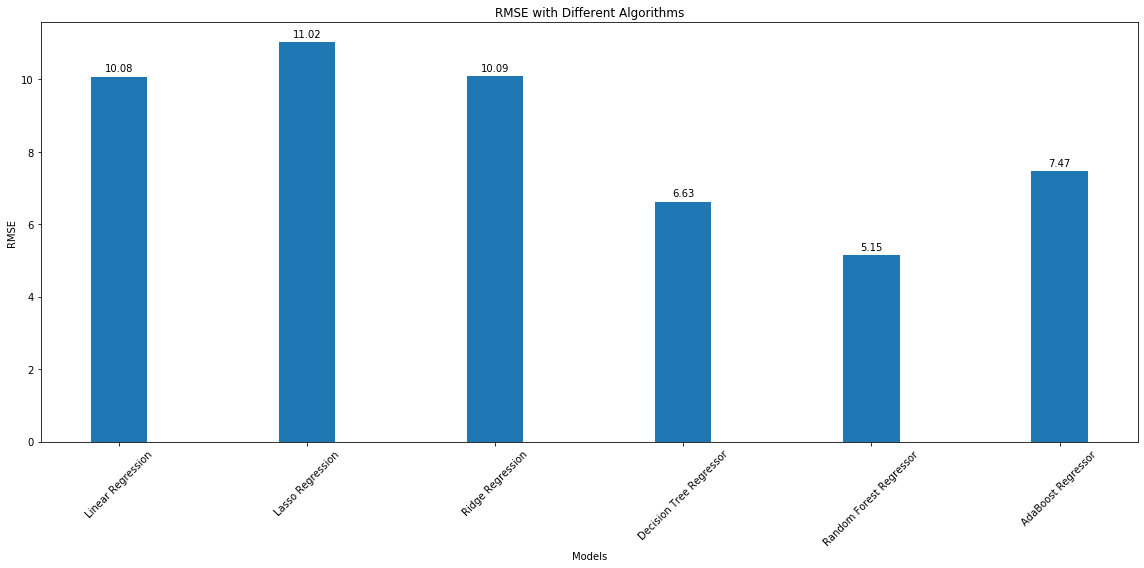

In [90]:
rmses = [] 

for model in models: 
   rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test)))) 

x = np.arange(len(names)) 
width = 0.3 
fig, ax = plt.subplots(figsize=(16,8)) 
rects = ax.bar(x, rmses, width) 
ax.set_ylabel('RMSE') 
ax.set_xlabel('Models') 
ax.set_title('RMSE with Different Algorithms') 
ax.set_xticks(x) 
ax.set_xticklabels(names, rotation=45) 
autolabel(rects) 
fig.tight_layout() 
plt.show()

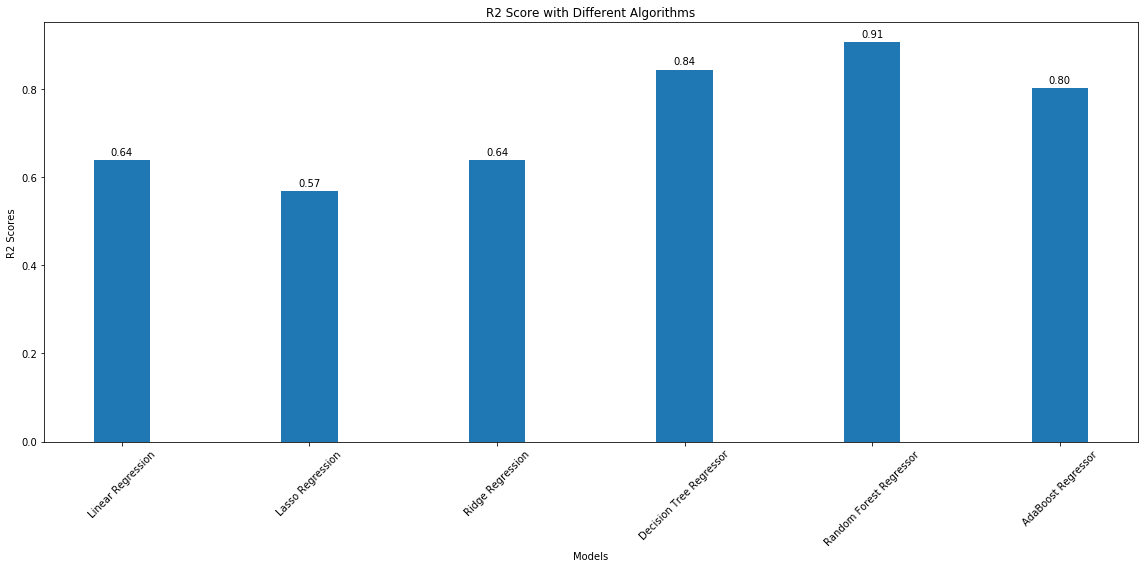

In [91]:
r2s = [] 

for model in models: 
   r2s.append(r2_score(y_test, model.predict(X_test))) 

x = np.arange(len(names)) 
width = 0.3 
fig, ax = plt.subplots(figsize=(16,8)) 
rects = ax.bar(x, r2s, width) 
ax.set_ylabel('R2 Scores') 
ax.set_xlabel('Models') 
ax.set_title('R2 Score with Different Algorithms') 
ax.set_xticks(x) 
ax.set_xticklabels(names, rotation=45) 
autolabel(rects) 
fig.tight_layout() 
plt.show()

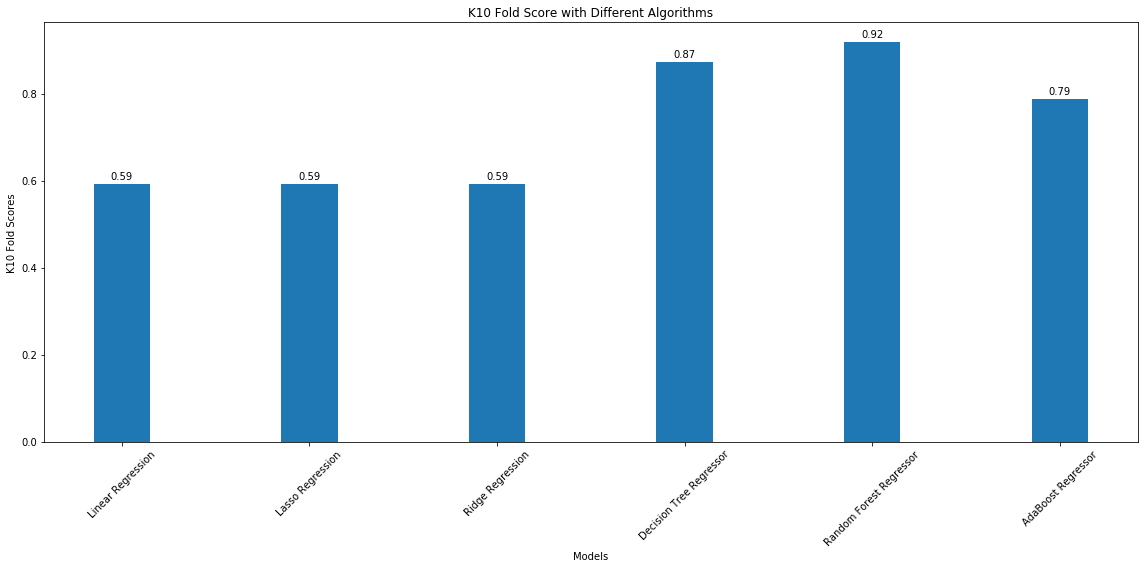

In [92]:
kfold = [] 

for model in models: 
   kfold.append(cross_val_score(model, X, y, cv = 10).mean()) 

x = np.arange(len(names)) 
width = 0.3 
fig, ax = plt.subplots(figsize=(16,8)) 
rects = ax.bar(x, kfold, width) 
ax.set_ylabel('K10 Fold Scores') 
ax.set_xlabel('Models') 
ax.set_title('K10 Fold Score with Different Algorithms') 
ax.set_xticks(x) 
ax.set_xticklabels(names, rotation=45) 
autolabel(rects) 
fig.tight_layout() 
plt.show()

### Hyperparameter  Tuning

In [93]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [102]:
from sklearn.model_selection import GridSearchCV

parameters = {
     'bootstrap': [True],
     'max_depth': [10, 20, 30, 40, 50],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4, 8],
     'n_estimators': [100]
    }


clf = GridSearchCV(RandomForestRegressor(), parameters, cv = 10, verbose= 2, n_jobs= 4)
clf.fit(X, y)

clf.best_params_

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   18.9s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   48.6s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:   53.7s finished


{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [103]:
rf = RandomForestRegressor(bootstrap= True, max_depth= 40, max_features= 'auto', min_samples_leaf= 1, n_estimators= 100)
score = cross_val_score(rf, X, y, cv = 10).mean()

# best score using 10 fold for RandomForestRegressor after grid search cv hyperparameter tuning
score

0.9162624986554648

In [97]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [104]:
param_grid = [
    {'max_depth': [3, 5, 10],
     'max_features': [3, 4, 5]}
]

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

grid_search.best_params_

{'max_depth': 10, 'max_features': 5}

In [105]:
dtr = DecisionTreeRegressor(max_depth=5, max_features=5) 

score = cross_val_score(dtr, X, y, cv = 10).mean()
score

0.7526115766448804

## Conclusion

Random Forest Regressor has higest R2 i.e. 92%

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Assignment Completed

Project work is checked in to github on below path:

https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-deepkanpur